# Codage de Huffman

[Vidéo d'accompagnement](https://vimeo.com/516288263)

Nous allons voir une application pratique des arbres binaires: un **algorithme de compression**.

Au départ, on dispose d'une chaîne de caractères qui peut être aussi «courte» que:

    anticonstitutionnellement

ou aussi longue qu'un *livre entier*...

Ordinairement, les chaînes sont encodées en UTF-8 (qui est un encodage à taille variable...) mais pour simplifier nous supposerons qu'elles le sont en ASCII (étendu) comme Latin-1. Dans cet encodage, *chaque caractère correspond à  8 bits*.

Ainsi, la chaîne "anticonstitutionnellement" nécessitera $25\times 8=200$ bits


In [ ]:
len("anticonstitutionnellement") * 8

## Fréquences des caractères d'une chaîne

La méthode proposée par Huffmann, pour *associer à chaque caractère de la chaîne à compresser un code binaire*, consiste en tout premier lieu à **récupérer la fréquence des caractères dans la chaîne à compresser**.

L'idée principale est que **plus un caractère se répète plus son code doit être court**. On cherche donc un codage où les codes sont de *taille variable*.

#### Exercice 1

Il est assez simple de récupérer la «fréquence» des caractères avec Python. Il suffit d'utiliser un dictionnaire dont les clés sont les caractères et les valeurs leur nombre de répétitions dans la chaîne. Ainsi, il suffit de parcourir la chaîne et d'actualiser le dictionnaire au fur et à messure.

In [ ]:
def frequences(chaine):
    """Renvoie la fréquence d'apparition de chaque caractères de la chaîne fournie en entrée sous la forme d'un dictionnaire."""
    dico = {}
    for car in chaine: # à chaque itération car contient un nouveau caractère de la chaine
        pass
    return dico

In [ ]:
def frequences(chaine):
    """Renvoie la fréquence d'apparition de chaque caractères de la chaîne fournie en entrée sous la forme d'un dictionnaire."""
    dico = {}
    for car in chaine:
        if car in dico:
            dico[car] += 1
        else:
            dico[car] = 1
    return dico

Par exemple, en appliquant cette fonction à "taratata" on obtient `{"r": 1, "t": 3,  "a": 4}`

In [ ]:
frequences("taratata")

## Arbre de Huffman

Ensuite, on se sert des fréquences obenues pour construire un arbre binaire particulier appelé **arbre de Huffman** pour la chaîne. 

Cet arbre binaire possède les caractéristiques suivantes:

1. Chaque caractère n'apparaît qu'une fois dans l'arbre et il correspond à une *feuille*,
2. l'arbre n'a aucun noeud simple. Autrement dit, tous ses *noeuds internes sont doubles*.
3. moins le caractère est fréquent, plus sa profondeur est grande.

#### Exercice 2

1. Essayer de trouver un arbre de Huffman pour "taratata" (il y a plusieurs possibilités)

2. Quel code binaire attriburiez-vous à chaque caractère?

Il est naturel de penser à l'*occurrence* de la feuille: on écris 0 lorsqu'on suit un lien gauche et 1 pour un lien droit en suivant la branche qui mène à la feuille visée.

Pour le premier arbre donné plus tôt, on obtient a: 0, t: 10 et r: 11.

3. Inversement, voici un arbre d'Huffman correspondant à une certaine chaîne. Sachant que l'expression binaire de cette chaîne *après codage* est:

        110101111111010010000001110
  
  essayez de retrouver la chaîne.

<p style="text-align: center;">
    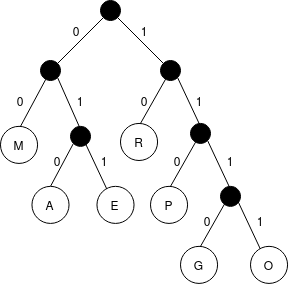
</p>

4. Écris la fonction `decoder(a, bits)` qui étant donné un arbre de huffman `a` et une chaîne de bits `bits` (str qui ne contient que "0" ou "1") renvoie la chaîne de caractère.correspondante. 

   On suppose que `a` est de type `N`oeud dont la classe est donnée ci-dessous:

In [37]:
class N:
    def __init__(self, v, g=None, d=None):
        self.v = v    # valeur portée par le noeud.
        self.g = g    # pour le fils gauche
        self.d = d    # ... droit

# codage de l'arbre donné plus haut
huff = N("",
         N("", 
           N("M"), 
           N("", N("A"), N("E"))
          ),
         N("", 
           N("R"),
           N("",
             N("P"),
             N("", N("G"), N("O"))
            ),
          ),
        )

# chaine de la question 3
test = "110101111111010010000001110"

In [ ]:
def decoder(a, bits):
    """Renvoie la chaîne de caractères correspondant au mot binaire «bits»
    en utilisant l'arbre de Huffman «a» pour le décoder."""
    pass

In [ ]:
def decoder(a, bits):
    """Renvoie la chaîne de caractères correspondant au mot binaire bits
    en utilisant l'arbre de Huffman a pour le décoder."""
    n = a
    caracteres = []
    for b in bits:
        if b == "0" and n.g is not None:
            n = n.g
        if b == "1" and n.d is not None:
            n = n.d
        if n.g is None and n.d is None:
            caracteres.append(n.v)
            n = a
    return "".join(caracteres)

Puis vérifier votre solution

In [ ]:
assert decoder(huff, test) == "PROGRAMMER"

## Construire l'arbre de Huffman d'une chaîne donnée

Mais comment obtenir un arbre de Huffman pour une chaîne de caractère donnée?

L'idée est de le construire «du bas vers le haut» de tel façon que les caractères les moins fréquents soit traités le plus tôt possible. 

Plus précisément, on utilise une **file de priorité min** qu'on initialise avec les noeuds feuilles de l'arbre.

La **clé** de la file de priorité est la fréquence des caractères; ces fréquences ont été obtenue à la première étape.

**Tant que la file a plus de deux éléments**:

- on extrait deux noeuds de la file,
- on les **fusionne** en un seul (voir plus bas),
- et on replace le noeud de fusion dans la file.

Que signifie fusionner? Chaque noeud d'un arbre de Huffman possède un champ `freq`; **Fusionner** deux noeuds `a` et `b` (feuille ou non) signifie:
- créer un nouveau noeud `n`: `n = N()`
- `a` devient son fils gauche et `b` son fils droit: `n.g = a` et `n.d = b`
- le champ `freq` du noeud `n` prend pour valeur la somme de ceux de ses fils: `n.freq = a.freq + b.freq`

Lorsque la file ne contient plus qu'un noeud, l'arbre est construit: sa racine est précisément l'unique noeud restant.

Voici ce que cela donne avec la chaîne ANTICONSTITUTIONNELLEMENT

On commence par calculer la fréquence des caractères (ou plutôt l'effectif):

<p style="text-align: center;">
    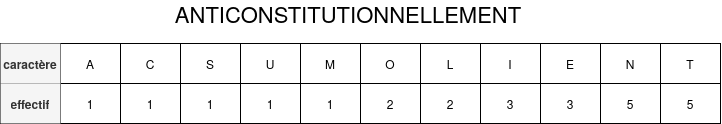
</p>

Puis on initialise la file de priorité avec les noeuds feuilles des caractères

<p style="text-align: center;">
    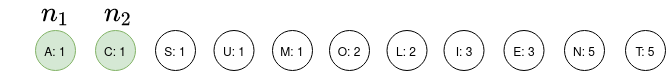
</p>

On extrait deux noeuds de la file $n_1$ et $n_2$ qu'on fusionne en un noeud $n$ puis on replace le noeud obtenu dans la file:

<p style="text-align: center;">
    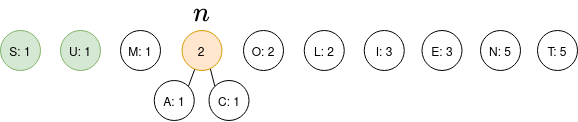
</p>

![huffman_fusion.png]()

Observez bien que la file de priorité min réorganise ses éléments en fonction de leur champ `freq`. Observez aussi qu'il y a un noeud (racine) de moins dans la file.

On recommence à nouveau et cela tant que la file contient plus de 2 noeuds:

<p style="text-align: center;">
    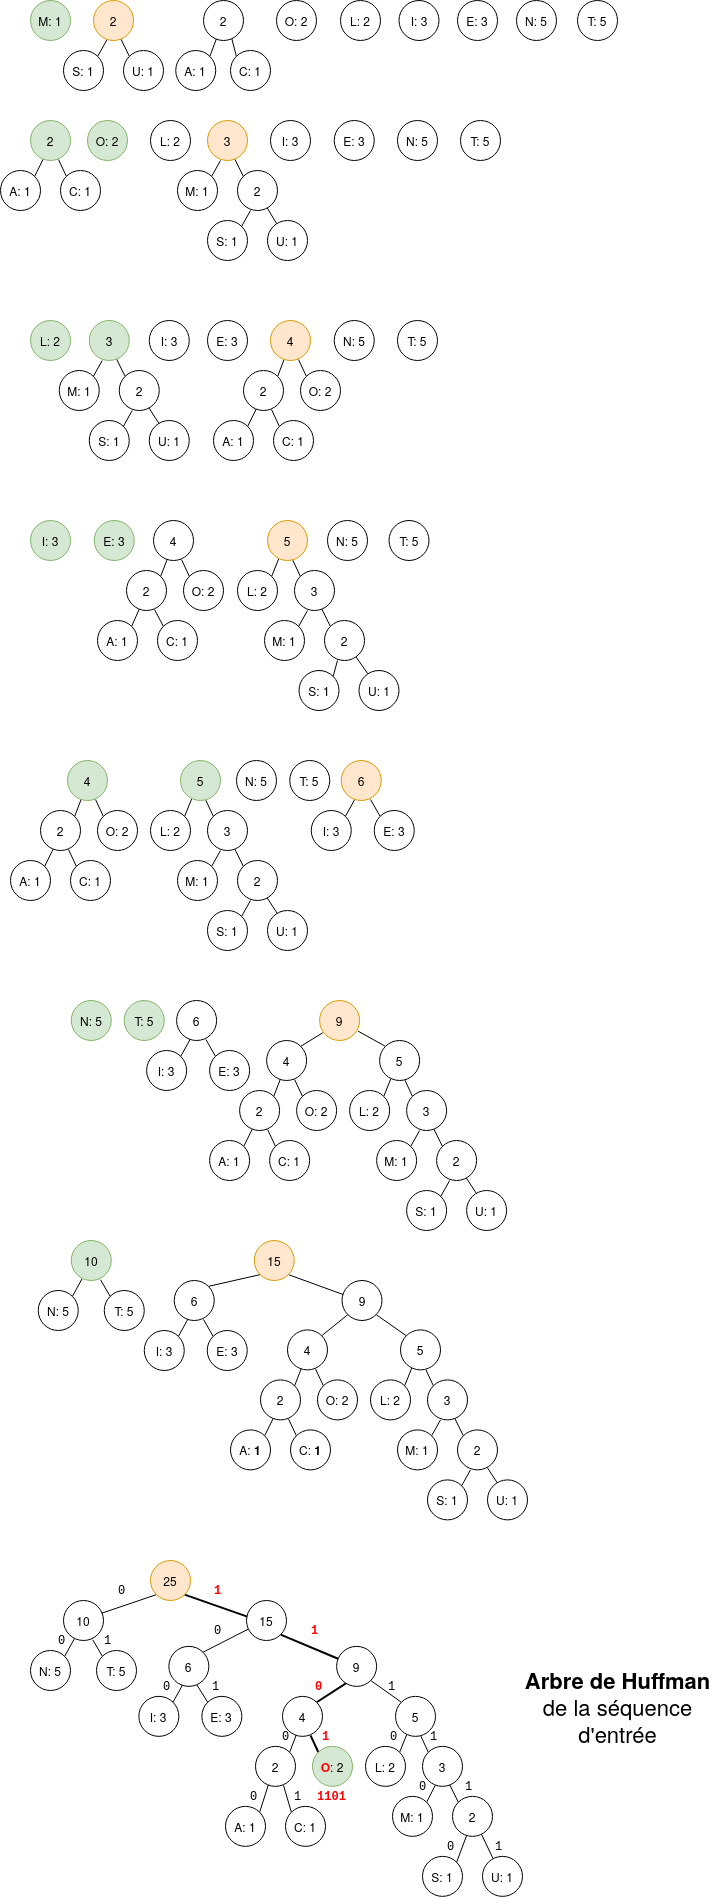
</p>

On peut résumer l'algorithme par le **pseudo-code**:

    Entrée: une chaîne de caractères.
    
    Sortie: un arbre de Huffman pour cette chaîne.
    
    Traitement:
    
        freqs ← Calculer la fréquence de chaque caractère distinct de la chaîne
        F ← Initialiser une file de priorité min avec un noeud pour chaque caractère de la chaîne; la file a pour clé le champ freq du noeud (initialisé avec freqs)
    
        TANT QUE F a au moins deux éléments:
        
            n1 ← F.extraire_min()
            n2 ← F.extraire_min()
            n  ← fusion(n1, n2)
            F.inserer(n)
        
        retourner F.extraire_min()

#### Exercice 3

Implémenter cet algorithme en utilisant la classe `TasMin` pour la *file de priorité*. Les instances de cette classe possède entre autre les méthodes suivantes:
- `.inserer(valeur)`
- `.extraire_min()`

De plus, le constructeur peut prendre en argument une liste pour l'initialisation. Il possède aussi un argument nommé `clefn` qui sert à préciser une fonction pour extraire la **clé** des objets stockés dans le tas.

In [ ]:
# Pour récupérer le module tas
import sys, os
if not sys.path[0].endswith("code"): # pour éviter de re-modifier sys.path
    sys.path.insert(0, os.path.join(sys.path[0], "code"))

In [ ]:
from tas import TasMin # pour la file de priorité min

class NHuff:
    def __init__(self, freq, v="", g=None, d=None):
        self.freq = freq; self.v = v; self.g = g; self.d = d

def fusion(n1, n2):
    pass

def huffman(chaine):
    pass

In [ ]:
from tas import TasMin # pour la file de priorité min

class NHuff:
    def __init__(self, freq, v="", g=None, d=None):
        self.freq = freq; self.v = v; self.g = g; self.d = d

def fusion(n1, n2):
    n = NHuff(n1.freq + n2.freq)
    n.g = n1
    n.d = n2
    return n

def huffman(chaine):
    freqs = frequences(chaine)
    liste = [NHuff(freqs[car], car) for car in freqs]
    
    F = TasMin(liste, clefn=lambda n: n.freq)
    while len(F) > 1:
        n1 = F.extraire_min()
        n2 = F.extraire_min()
        n = fusion(n1, n2)
        F.inserer(n)
    return F.extraire_min()

## Associer chaque caractère à son code

Une fois l'arbre de Huffman obtenu, on le parcourt afin de construire un dictionnaire qui associe chaque caractère au code de Huffman correspondant. Pour l'exemple qui nous occupe, cela donne:

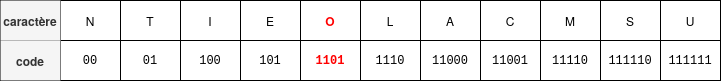

En effet, pour encoder la chaîne, il est beaucoup plus simple d'utiliser le dictionnaire que de parcourir l'arbre de Huffman pour chaque caractère de la chaîne.

#### Exercice 4 - huffman vers table d'encodage

Essais d'implémenter cela en réalisant un *parcours préfixe* de l'arbre de Huffman fourni en argument. Il faudra prendre garde *à transmettre les bonnes informations dans les appels récursifs*.

In [ ]:
def codes_huff(a, d={}, code=""):
    """Renvoie le dictionnaire d qui associe chaque caractère
    de l'arbre d'Huffman son code.
    Note: le dictionnaire fait partie des paramètres car autrement
    chaque appel récursif le réinitialiserait... de même pour le code...
    On utilise un parcourt préfixe.
    """
    # traitement pour le noeud courant, si c'est une feuille:
    # lire son caractère et utiliser la valeur de code pour cet appel
    pass
    # appel récursif pour le sous-arbre gauche: 
    # transmettre le dictionnaire courant d et ajuster le paramètre code à partir du code courant
    pass
    # appel récursif pour le sous-arbre droit (similairement)
    pass

In [ ]:
def codes_huff(huff, d={}, code=""):
    if huff.g is None and huff.d is None:
        d[huff.v] = code
    if huff.g is not None:
        codes_huff(huff.g, d, code + "0")
    if huff.d is not None:
        codes_huff(huff.d, d, code + "1")
    return d

____

## Synthèse: Encoder/décoder

Il ne nous manque plus qu'une fonction `encoder(chaine)` qui, pour simplifier (car à ce stade il faudrait en réalité travailler sur des `bytes`...), renvoie un couple:
- sa première composante est l'arbre de Huffmann de la chaine,
- sa deuxième composante est une chaîne formée de "0" et de "1" obtenue en appliquant les codes de Huffman.

*Note*: On renvoie l'arbre de Huffmann car on en a besoin pour décoder à nouveau la chaîne.

Dans la réalité, l'arbre de Huffman est lui-même «encodé» dans la chaîne binaire. Par exemple si vous compressez un fichier et que vous l'envoyez sur un autre ordinateur dans le réseau, pour décompresser le fichier il va falloir reconstituer l'arbre d'Huffman qui a servi à la compression...

#### Exercice 5 - encoder

En combinant les fonctions précédentes, implémenter la fonction ci-dessous:

In [ ]:
def encoder(chaine):
    """Renvoie l'arbre de Huffman associé à la chaîne ainsi
    que la chaîne encodée à partir de celui-ci. 
    (simple string formée de 0 et de 1 pour simplifier)"""
    pass

In [ ]:
def encoder(chaine):
    huff = huffman(chaine)
    codes = codes_huff(huff)
    ret = []
    for car in chaine:
        ret.append(codes[car])
        # print(car, ret)
    return huff, "".join(ret)     

Vérifiez votre solution en encodant puis en décodant.

In [ ]:
a_encoder = "ANTICONSTITUTIONNELLEMENT"
huff, enc = encoder(a_encoder)
print(f"Lorsqu'on encode «ANTICONSTITUTIONNELLEMENT» on obtient:\n\t {enc}\n")
print(f"taille initial (en bits): {len(a_encoder) * 8}; taille après compression: {len(enc)}")
taux = 1 - len(enc)/(len(a_encoder) * 8)
print(f"Le taux de compression est {round(taux * 100, 1)}%")

In [ ]:
assert decoder(huff, enc) == a_encoder

#### Exercice 6 - Application à un fichier texte

Dans le répertoire courant vous trouverez un fichier texte contenant l'intégralité du «Tour du monde en 80j»

1. Appliquer la méthode des «codes de Huffman» à ce fichier puis mesurer sa taille en bits. 

In [ ]:
# Lire le fichier
with open("ltdme80j.txt") as f:
    contenu = f.read()

# encoder son contenu
huff, enc = encoder(contenu)

# 
taille_apres = len(enc) # taille en bits
print(enc[:1000]) # on limite à 1000 chiffres binaires

2. Quel est le taux de compression observé (1-taille_apres/ taille_avant)? *Note*: str.encode("utf-8") renvoie le tableau d'octets qui correspond à la chaîne; reste à utiliser len...

In [ ]:
# connaître la taille initiale: 
octets = contenu.encode("utf-8")
taille_avant = len(octets) * 8 # taille en bits
# Calculer/afficher le taux de compression
taux_compression = (1 - taille_apres / taille_avant) * 100
print(f"La compression est de {round(taux_compression, 1)} %")

3. Vérifier que le décodage rend bien le texte original.

In [ ]:
# vérifions que nous sommes capables de décoder le fichier encodé
contenu = decoder(huff, enc)
print(contenu[:2000]) # le slice pour limiter l'affichage